### MATH 3375 Project 3 - Dimension Reduction

For this project, we will use a data set with several attributes of white wine to predict the quality of the wine. The data set was obtained from the Machine Learning Repository at UC Irvine. 

Below is documentation related to the data set. (_Note that we are only using the **white** wine data for this assignment._)

    1. Title: Wine Quality 

    2. Sources
       Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, 
       Telmo Matos and Jose Reis (CVRVV) @ 2009
   
    3. Past Usage:

    P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
    Modeling wine preferences by data mining from physicochemical properties.
    In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

    In the above reference, two datasets were created, using red and white wine samples. 
    The inputs include objective tests (e.g. PH values) and the output is based on sensory data
    (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
    between 0 (very bad) and 10 (very excellent). 
 
    4. Relevant Information:

    The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. 
    For more details, consult: http://www.vinhoverde.pt/en/ or reference [Cortez et al., 2009]. 
    Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output)
    variables are available (e.g. there is no data about grape types, wine brand, wine selling 
    price, etc.).

    The classes are ordered and not balanced (e.g. there are munch more normal wines than 
    excellent or poor ones). Outlier detection algorithms could be used to detect the few 
    excellent or poor wines. Also, we are not sure if all input variables are relevant. 
    So it could be interesting to test feature selection methods. 

    5. Number of Instances: red wine - 1599; white wine - 4898. 

    6. Number of Attributes: 11 + output attribute
  
    Note: several of the attributes may be correlated, thus it makes sense to apply some 
    sort of feature selection.

    7. Attribute information:

    For more information, read [Cortez et al., 2009].

    Input variables (based on physicochemical tests):
        1 - fixed acidity
        2 - volatile acidity
        3 - citric acid
        4 - residual sugar
        5 - chlorides
        6 - free sulfur dioxide
        7 - total sulfur dioxide
        8 - density
        9 - pH
        10 - sulphates
        11 - alcohol
    
    Output variable (based on sensory data from wine experts): 
        12 - quality (score between 0 and 10)

    8. Missing Attribute Values: None


In [1]:
wine_data <- read.csv("winequality_white.csv")
head(wine_data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


## Partitioning Data

This step is done for you below.  Note that you should train ALL models **_using ONLY_ wine_train**.  We are saving **wine_test** to evaluate performance of the models.

In [2]:
set.seed(3375)

train_size <- round(nrow(wine_data) * 0.7, 0)
train_rows <- sample(1:nrow(wine_data), train_size)

wine_train <- wine_data[train_rows,]
wine_test <- wine_data[-train_rows,]


## Tasks

### Exploratory Data Analysis

##### 1. Create a boxplot, histogram, and data summary for the response variable (wine quality).

Use the **_original data set_** (wine_data) for this step.

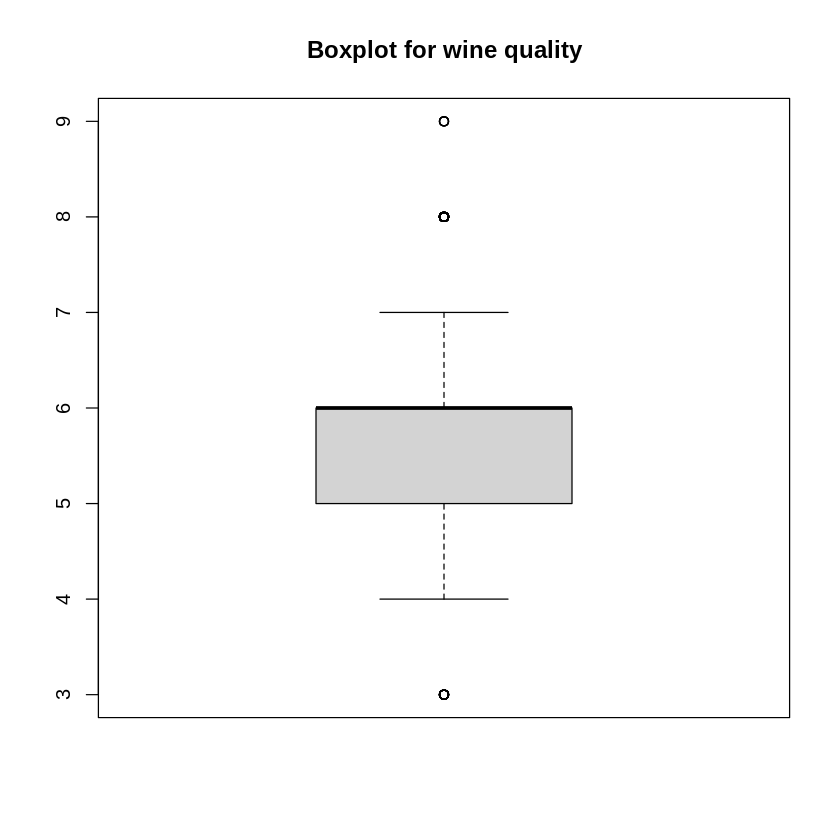

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   5.878   6.000   9.000 

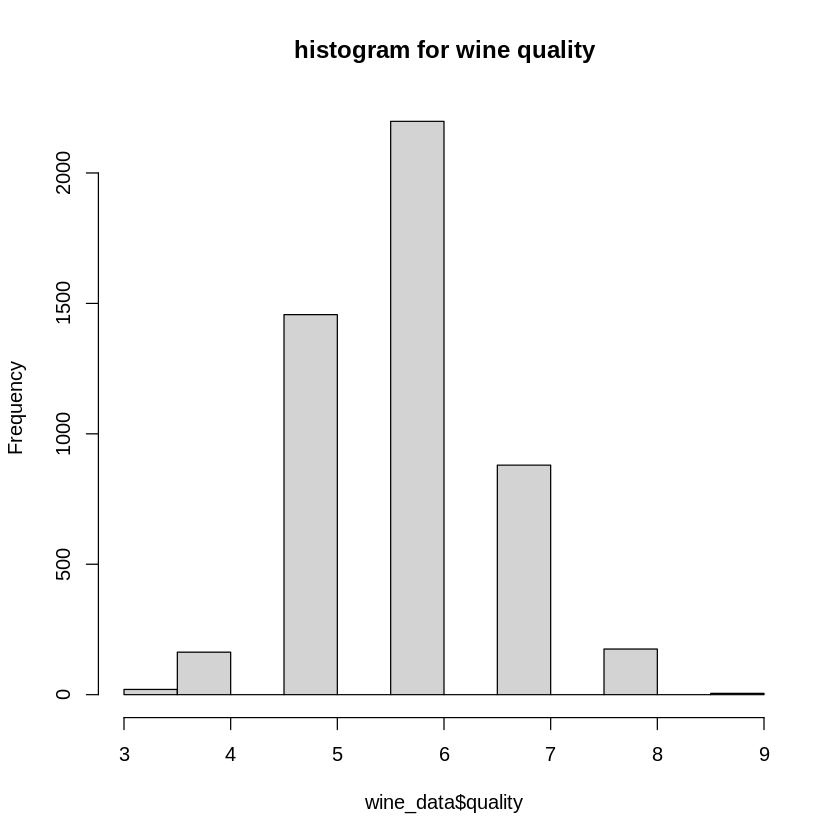

In [3]:
#Put solution to Exercise 1 in this cell. You may add additional cells if you like.
boxplot(wine_data$quality , main = "Boxplot for wine quality")
hist(wine_data$quality, main = "histogram for wine quality")
summary(wine_data$quality)

##### 1a. What observations do you have about the distribution of the response variable?

the response variable has a mean of 5.8 and a median of 6.0. the histogram has a slightly left skewed distribution. meaning that it is less likely for a variable to be above 6 than below 6. there are a couple outliers in the response variable, as you can see in the boxplot.

### Multicollinearity

##### 2. Create a correlation matrix to show plots of the relationship between all variables in the data set.

Use the **_original data set_** (wine_data) for this step.

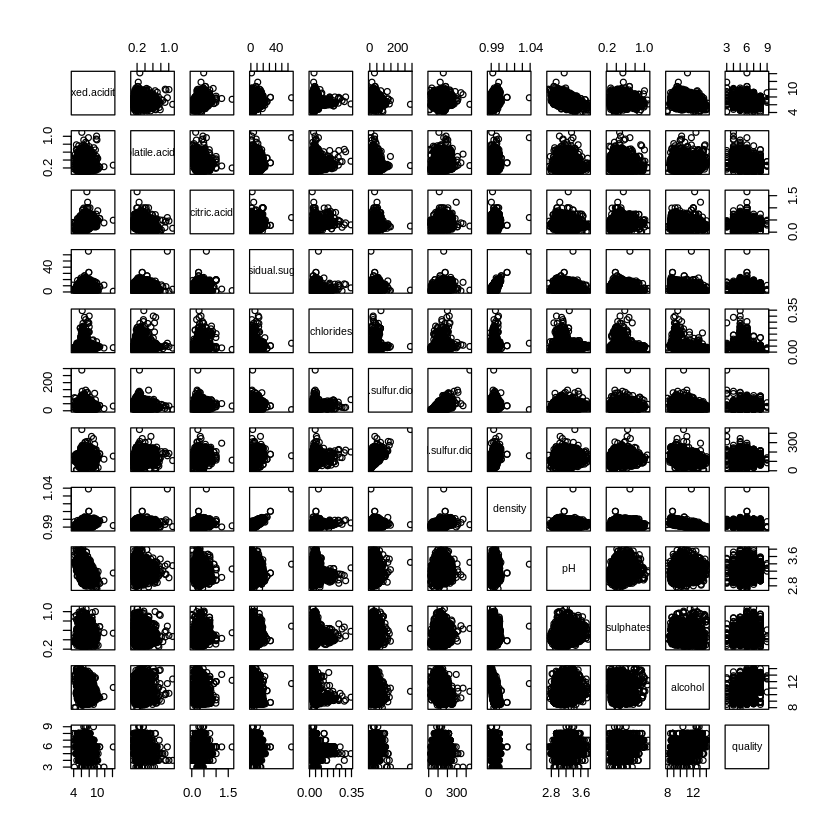

In [4]:
#Put solution to Exercise 2 in this cell. You may add additional cells if you like.
plot(wine_data)


##### 3. Examine Variance Inflation Factors for a Full Model

* Create a model predicting quality using all other features in the data set as predictors. **Use only the training data set** (wine_train) to create this model.
* Print a summary of your model.
* Compute the VIF for all the predictors in the data set.

In [5]:
install.packages("regclass")
library("regclass")

also installing the dependencies ‘shape’, ‘RcppEigen’, ‘glmnet’, ‘grpreg’, ‘pls’, ‘bestglm’, ‘leaps’, ‘VGAM’, ‘rpart.plot’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: bestglm

Loading required package: leaps

Loading required package: VGAM

Loading required package: stats4

Loading required package: splines

Loading required package: rpart

Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Important regclass change from 1.3:
All functions that had a . in the name now have an _
all.correlations -> all_correlations, cor.demo -> cor_demo, etc.




In [13]:
#Put solution to Exercise 3 in this cell. You may add additional cells if you like.
wine_model12 <- lm(quality ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + chlorides + 
                   free.sulfur.dioxide + total.sulfur.dioxide + density + pH + sulphates + alcohol, data = wine_data )
summary(wine_model12)
VIF(wine_model12)


Call:
lm(formula = quality ~ fixed.acidity + volatile.acidity + citric.acid + 
    residual.sugar + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    density + pH + sulphates + alcohol, data = wine_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8348 -0.4934 -0.0379  0.4637  3.1143 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.502e+02  1.880e+01   7.987 1.71e-15 ***
fixed.acidity         6.552e-02  2.087e-02   3.139  0.00171 ** 
volatile.acidity     -1.863e+00  1.138e-01 -16.373  < 2e-16 ***
citric.acid           2.209e-02  9.577e-02   0.231  0.81759    
residual.sugar        8.148e-02  7.527e-03  10.825  < 2e-16 ***
chlorides            -2.473e-01  5.465e-01  -0.452  0.65097    
free.sulfur.dioxide   3.733e-03  8.441e-04   4.422 9.99e-06 ***
total.sulfur.dioxide -2.857e-04  3.781e-04  -0.756  0.44979    
density              -1.503e+02  1.907e+01  -7.879 4.04e-15 ***
pH                    6.863e-01  1

fixed.acidity     volatile.acidity          citric.acid 
            2.691435             1.141156             1.165215 
      residual.sugar            chlorides  free.sulfur.dioxide 
           12.644064             1.236822             1.787880 
total.sulfur.dioxide              density                   pH 
            2.239233            28.232546             2.196362 
           sulphates              alcohol 
            1.138540             7.706957

##### 4. Based on your results in items 2 and 3, do you believe multicollinearity is an issue for this data set?

Explain your reasoning clearly. Be sure to compare VIF values to an appropriate threshold. 

fixed acidity, residual sugar, total sulfur dioxide, density, pH, alcohol are highly correlated with one or more predictors. the multicollinearity can be an issue since the VIF of these are significantly greater than 1.
volatile acidity, citric acid, chlorides, free sulfur dioxide, and sulphates have little multicollinearily with other predictors since the VIF value is close to 1.

### Models

Remember to use the **_training data_** set (wine_train) to create each of the models below.

##### 5. Create a forward stepwise regression model.

Start with a model using no predictors and allow R to show the steps taken in determining the final model.  Be sure to show a summary of the final model.

In [7]:
#Put solution to Exercise 5 in this cell. You may add additional cells if you like.
wine_model0 <- lm(quality ~ 1, data=wine_train)
#the lm (...) are quantative variables
wine_model_full <- lm(quality ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + chlorides + 
                   free.sulfur.dioxide + total.sulfur.dioxide + density + pH + sulphates + alcohol, data = wine_data)
wine_model_step = step(wine_model0, scope=list(lower=wine_model0, upper=wine_model_full), direction = "forward", k=2)
summary(wine_model_step)

Start:  AIC=-869.34
quality ~ 1

                       Df Sum of Sq    RSS      AIC
+ alcohol               1    532.00 2127.6 -1632.64
+ density               1    266.24 2393.3 -1229.02
+ chlorides             1    126.34 2533.2 -1034.23
+ volatile.acidity      1     83.99 2575.6  -977.37
+ total.sulfur.dioxide  1     82.43 2577.1  -975.30
+ fixed.acidity         1     44.96 2614.6  -925.80
+ pH                    1     36.90 2622.7  -915.25
+ residual.sugar        1     30.72 2628.8  -907.17
+ sulphates             1      3.00 2656.6  -871.21
+ citric.acid           1      1.60 2658.0  -869.41
<none>                              2659.6  -869.34
+ free.sulfur.dioxide   1      0.01 2659.6  -867.35

Step:  AIC=-1632.64
quality ~ alcohol

                       Df Sum of Sq    RSS     AIC
+ volatile.acidity      1   125.185 2002.4 -1838.6
+ free.sulfur.dioxide   1    35.686 2091.9 -1688.7
+ residual.sugar        1    26.399 2101.2 -1673.5
+ fixed.acidity         1    15.265 2112.3 -165


Call:
lm(formula = quality ~ alcohol + volatile.acidity + residual.sugar + 
    fixed.acidity + free.sulfur.dioxide + density + pH + sulphates, 
    data = wine_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8027 -0.4822 -0.0384  0.4650  3.1459 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.287e+02  2.027e+01   6.351 2.43e-10 ***
alcohol              2.294e-01  2.715e-02   8.450  < 2e-16 ***
volatile.acidity    -1.844e+00  1.308e-01 -14.091  < 2e-16 ***
residual.sugar       7.287e-02  8.369e-03   8.708  < 2e-16 ***
fixed.acidity        4.409e-02  2.338e-02   1.886 0.059438 .  
free.sulfur.dioxide  3.302e-03  7.988e-04   4.133 3.67e-05 ***
density             -1.288e+02  2.055e+01  -6.268 4.13e-10 ***
pH                   6.799e-01  1.208e-01   5.627 1.98e-08 ***
sulphates            4.371e-01  1.190e-01   3.673 0.000243 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error:

##### 6. Use LASSO to select a subset of the variables. 

* First create a LASSO model using all features as predictors
* Show a summary of the LASSO model coefficients
* Using only the predictors not eliminated by LASSO, create an ordinary least squares (OLS) model
* Show the OLS model summary

In [8]:
install.packages("glmnet") #this standardize the data
library(glmnet)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: Matrix

Loaded glmnet 4.1-8



[1] 0.001919749

[1] 0.03768546

12 x 1 sparse Matrix of class "dgCMatrix"
                               s1
(Intercept)           3.032195139
fixed.acidity        -0.026843555
volatile.acidity     -1.596352047
citric.acid           .          
residual.sugar        0.010499375
chlorides            -0.244235814
free.sulfur.dioxide   0.001974273
total.sulfur.dioxide  .          
density               .          
pH                    .          
sulphates             0.087424107
alcohol               0.314375982


Call:
lm(formula = quality ~ fixed.acidity + volatile.acidity + residual.sugar + 
    chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    sulphates + alcohol, data = wine_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8838 -0.4968 -0.0301  0.4582  3.2118 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.6626007  0.1805515  14.747  < 2e-16 ***
fixed.acidity        -0.0639928  0.0130618  -4.899 9.93e-07 ***
volatile.acidity     -1.9633712  0.1121421 -17.508  < 2e-16 ***
residual.sugar        0.0247106  0.0025100   9.845  < 2e-16 ***
chlorides            -1.0664048  0.5366994  -1.987   0.0470 *  
free.sulfur.dioxide   0.0046577  0.0008374   5.562 2.81e-08 ***
total.sulfur.dioxide -0.0007755  0.0003692  -2.100   0.0357 *  
sulphates             0.4451694  0.0961793   4.629 3.78e-06 ***
alcohol               0.3629271  0.0112363  32.300  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ 

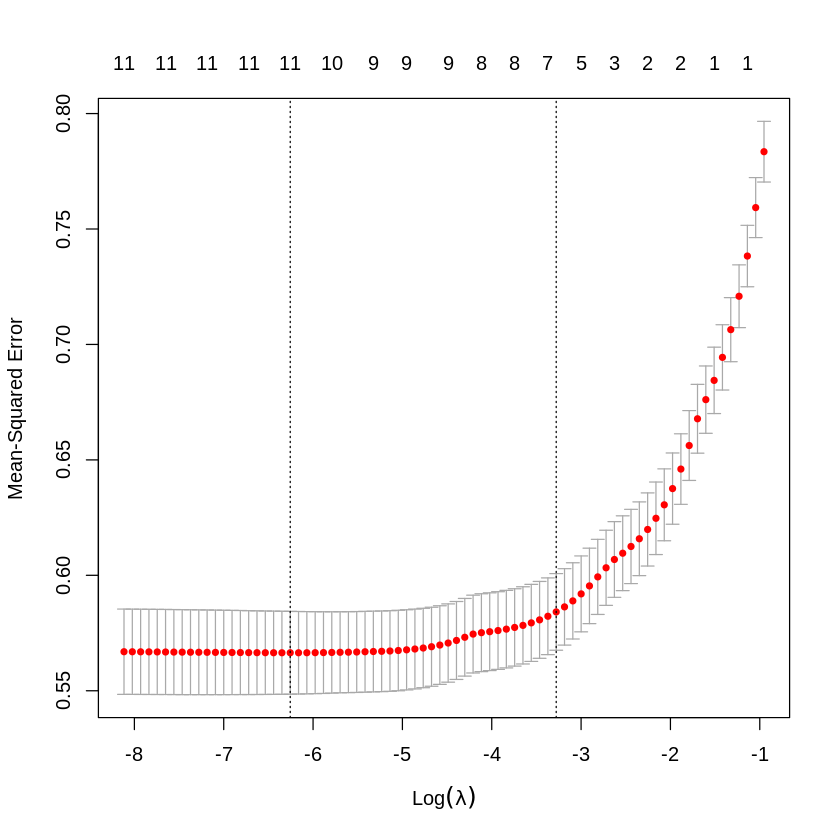

In [9]:
#Put solution to Exercise 6 in this cell. You may add additional cells if you like.
set.seed(3375)
wine_model_lasso <- cv.glmnet(x=as.matrix(wine_data[c(1:11)]),y=as.matrix(wine_data[12]),alpha=1,nfolds=5)
plot(wine_model_lasso)

wine_model_lasso$lambda.min
wine_model_lasso$lambda.1se

coef(wine_model_lasso)

wine_model_ols_lasso <- lm(quality ~ fixed.acidity+volatile.acidity+residual.sugar+
                           chlorides+free.sulfur.dioxide+total.sulfur.dioxide+sulphates+alcohol, data=wine_data)
summary(wine_model_ols_lasso)

##### 7. Create an Elastic Net Model

* Create the Elastic Net using all features as predictors, with an alpha value of 0.5
* Show a summary of the Elastic Net model coefficients

12 x 1 sparse Matrix of class "dgCMatrix"
                               s1
(Intercept)           3.147882406
fixed.acidity        -0.033992386
volatile.acidity     -1.586980764
citric.acid           .          
residual.sugar        0.010624167
chlorides            -0.695611356
free.sulfur.dioxide   0.002141125
total.sulfur.dioxide  .          
density               .          
pH                    0.002524710
sulphates             0.136119920
alcohol               0.306080370

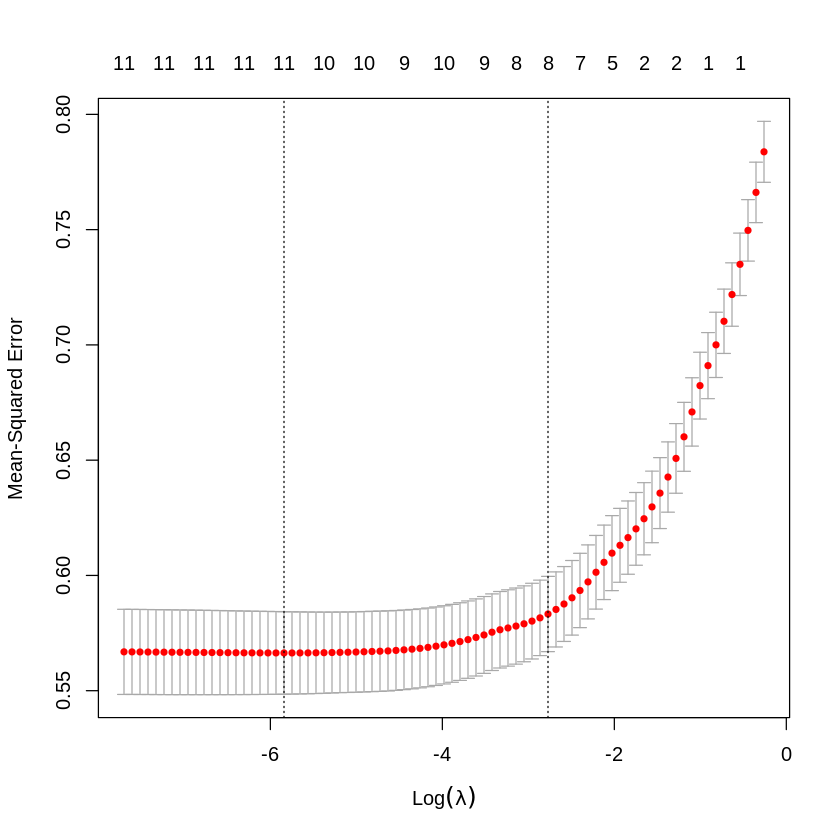

In [10]:
#Put solution to Exercise 7 in this cell. You may add additional cells if you like.
set.seed(3375)
wine_model_elastic <- cv.glmnet(x=as.matrix(wine_data[c(1:11)]),y=as.matrix(wine_data[12]),alpha=0.5,nfolds=5)
plot(wine_model_elastic)

coef(wine_model_elastic)

##### 8. Compute Mean Square Error (MSE)

Using the **_test data set_** (wine_test), compute the MSE for each of the 3 models (Stepwise, OLS with LASSO-selected features, and Elastic Net).

In [21]:
#Put solution to Exercise 8 in this cell. You may add additional cells if you like.
#stepwise
# Make predictions using the stepwise model
predictions <- predict(wine_model_step, newdata = wine_test)
residuals <- wine_test$quality - predictions
mse <- mean(residuals^2)
print(mse)

#ols with lasso
optimal_lambda <- wine_model_lasso$lambda.min
# Make predictions using the LASSO model with the optimal lambda
predictions1 <- predict(wine_model_lasso, newx = as.matrix(wine_test[c(1:11)]), s = optimal_lambda)
residuals1 <- wine_test$quality - predictions1
mse <- mean(residuals1^2)
print(mse)

#elastic net
mse_values <- wine_model_elastic$cvm
cv_mse <- mean(mse_values)
print(cv_mse)


[1] 0.5855832
[1] 0.5821899
[1] 0.5976809


##### 8a. Compare the Models

Type your answers in this cell.

1. Which predictors were included in each model? What was different and what was the same?

they all used the same predictor and response variable. they all had quality as the predictor and the response was all of the other variables in the data set. the difference is what we set alpha to to determine which model we would be using.

2. Which models had the highest and lowest MSE?

the ols with lasso is the better fit since it has the lowest MSE with 0.5821899 and elastic net has the least best fit with the highest MSE of 0.5976809.

3. Which model would you choose to make predictions, and why?

i would choose the ols with lasso since it has the better fit MSE at 0.5821899. it shows that the predicted value is closer to the actual value. it suggests better accuracy and a better fit of the data.